<img src="images/LOGO_2.jpeg" width="450" height='450'/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Here we are renaming the columns according to our need instead of the ones's that are present in the csv file**

In [2]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
df = pd.read_csv('/root/Desktop/adult-data.csv',names=cols)

**Here is a work for you try and see the names of the columns that are present in the csv but before doing that comment the cols and names=cols**

In [3]:
df.head()   # gives by default the top five rows of the data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.tail()    #gives bottom five rows of the data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.shape   #define the size of the data i.e (no. of rows * no. of columns)

(32561, 15)

In [6]:
df.describe()   # To analyze the numeric column in the data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()   # checking if there is any empty or missing values in the data

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

In [9]:
cat_columns = list(df.select_dtypes('object').columns)
num_columns = list(df.select_dtypes('int64').columns)

In [10]:
cat_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Salary']

In [11]:
num_columns

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [12]:
from sklearn.impute import SimpleImputer

imputer_cat = SimpleImputer(strategy='constant',fill_value='missing')

cat_columns.remove('Salary')
cat_data=imputer_cat.fit_transform(df[cat_columns])

In [13]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

**Here we can see that are 583 native-countries that have missing values**

# using forwared fill (ffill) to fillthe missing values

In [14]:
for col in cat_columns:
    df[col] = df[col].str.strip().replace('?',np.nan)

df1= df.fillna(method='ffill')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
enc = OneHotEncoder()
cat_oh_data = enc.fit_transform(cat_data)

**The features are encoded using a one-hot encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array**

In [16]:
cat_oh_data[:5].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

**As we can see that there is no missing values in the data, therefore we will the see the correlation of data and then check the outliers of the target column**

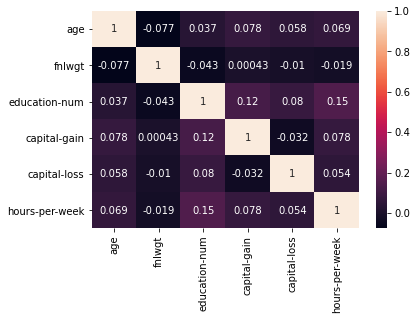

In [17]:
sns.heatmap(df.corr() , annot=True)
plt.show()

In [18]:
im = SimpleImputer(strategy='median')
num_data = im.fit_transform(df[num_columns])
print (num_data.shape)

(32561, 6)


In [19]:
scaler = MinMaxScaler()
num_scaled_data = scaler.fit_transform(num_data)

In [20]:
feature_data = np.hstack([cat_oh_data.toarray(), num_scaled_data])

# Now preparing model

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**here our x=feature_data and y=df.Salary**

In [22]:
trainx,testx, trainy, testy = train_test_split(feature_data,df.Salary, test_size=0.2)

In [23]:
log = LogisticRegression()

In [24]:
log.fit(trainx,trainy)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
pred = log.predict(testx)
pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype=object)

In [26]:
log.score(testx, testy)*100

85.29095654844157

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(testy,pred)

array([[4655,  353],
       [ 605,  900]])

# Decission Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtc = DecisionTreeClassifier()

In [31]:
dtc.fit(trainx, trainy)

DecisionTreeClassifier()

In [32]:
pred = dtc.predict(testx)

In [33]:
confusion_matrix(testy,pred)

array([[4408,  600],
       [ 554,  951]])

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(testy,pred)*100

82.2815906648242

# GOOD LUCK

**About the Author**

<p>Hi! It's <a href="https://www.intellicial.in/">Intellicial Team</a> the author of this notebook. I hope you found this Notebook easy to learn!</p>

<p>Copyright © . <a href="https://www.intellicial.in/">Intellicial Innovations</a> .</p>